## Data Science Job Salaries - EDA - Project

___
**I have collected this dataset from [kaggle](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries). This dataset contains data from 2020 to 2022 with various job titles.** 

**Importing Data Analysis and visualization libraries**

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Importing Data from CSV file**

In [228]:
data = pd.read_csv('ds_salaries.csv')

In [229]:
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


**Reading dataset Information**

In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


**This dataset contains 607 entries and 12 columns**

In [231]:
data.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

___
## Now it's Data Cleaning time!

___
**1. In this dataset there is a unnecessary column at first. So I am going to drop the first column.**

In [232]:
data.drop(['Unnamed: 0'],axis=1, inplace=True)

___
**2. In this dataset there are three columns that shows about salary. As we have one column salary_in_usd that shows the salary in usd. So now I am going to drop the remaining two columns.**

In [233]:
data.drop(['salary', 'salary_currency'], axis=1, inplace=True)

In [234]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

In [235]:
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


___
**3. If we observe in the above dataset in the column values contains words in shortcut form. So I am going to change it and replace with word.**

In [236]:
data['experience_level'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [237]:
data['experience_level'] = data['experience_level'].map({'MI':'Mid','SE':'Senior','EN':'Entry','EX':'Expert'})

In [238]:
data['employment_type'].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [239]:
data['employment_type'] = data['employment_type'].map({'FT':'Full-Time','CT':'Contract','PT':'Part-Time','FL':'Freelancer'})

In [240]:
data['remote_ratio'].unique()

array([  0,  50, 100], dtype=int64)

In [241]:
data['remote_ratio'] = data['remote_ratio'].map({0:'No Remote',50:'Partially Remote',100:'Fully Remote'})

In [242]:
data['company_size'].unique()

array(['L', 'S', 'M'], dtype=object)

In [243]:
data['company_size'] = data['company_size'].map({'L':'Large','S':'Small','M':'Medium'})

In [244]:
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid,Full-Time,Data Scientist,79833,DE,No Remote,DE,Large
1,2020,Senior,Full-Time,Machine Learning Scientist,260000,JP,No Remote,JP,Small
2,2020,Senior,Full-Time,Big Data Engineer,109024,GB,Partially Remote,GB,Medium
3,2020,Mid,Full-Time,Product Data Analyst,20000,HN,No Remote,HN,Small
4,2020,Senior,Full-Time,Machine Learning Engineer,150000,US,Partially Remote,US,Large


Now we are able to identfy the column values in readable.

___
**4. Checking for missing values.**

In [245]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

No missing values.

___
**5. checking for duplicate values.**

In [246]:
data.duplicated().sum()

42

In [247]:
data.drop_duplicates(inplace=True)

In [248]:
data.shape

(565, 9)

After deleting duplicates dataset reduced 607 to 565 entries.

___
## Now it's Analysis time!

**1. Now let's analyze the Salary range of data science jobs**

<Axes: xlabel='salary_in_usd'>

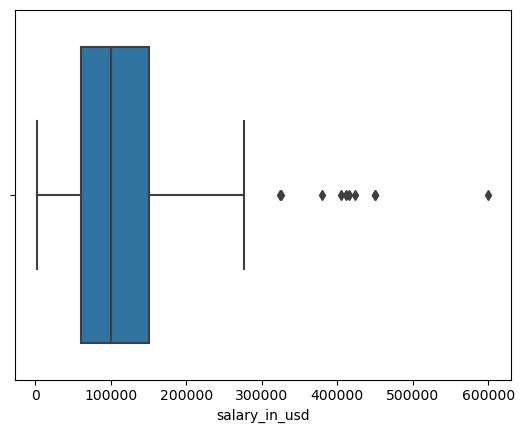

In [249]:
sns.boxplot(data=data,x='salary_in_usd')

**Note above:** The salary range for data science jobs is mostly below $3,00,000.

In [250]:
# let's see how many outliers above 300000
data_outliers = data[data['salary_in_usd'] > 300000]
data_outliers.shape

(10, 9)

In [251]:
# Delete the outliers
data = data[~(data['salary_in_usd'] > 300000)]
data.shape

(555, 9)

##### Note: let's create a function that avoid to write more values at visualizing the graph.

In [252]:
def count_plot(feature):
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data=data, x=feature)
    for p in ax.patches:
        ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
        plt.xticks(rotation=90)

___
**2. Work Year**

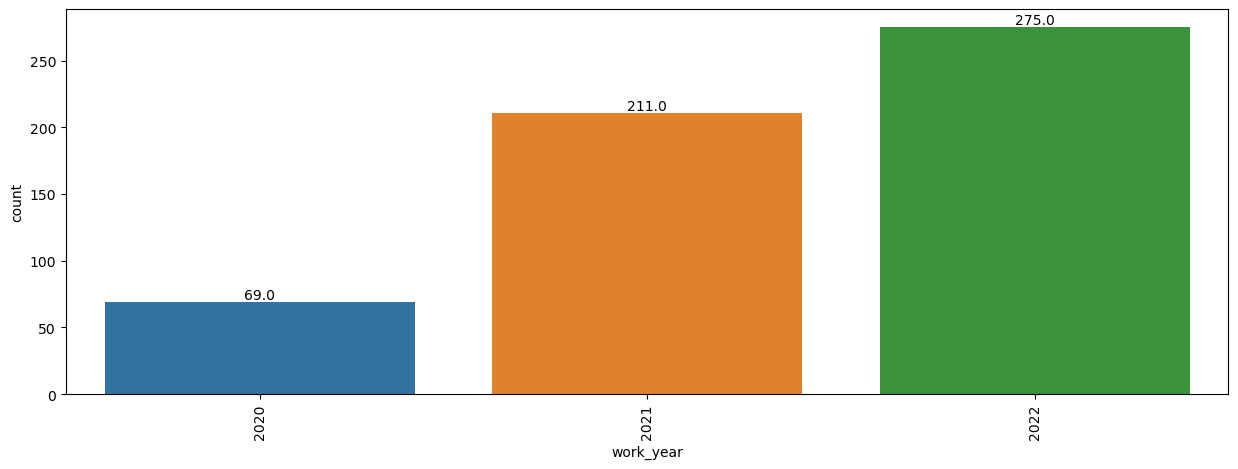

In [253]:
# countplot for workyear
count_plot('work_year')

**Note above:** Here most of the records are from the year 2022 and next year 2021.

___
**3. Employment Type**

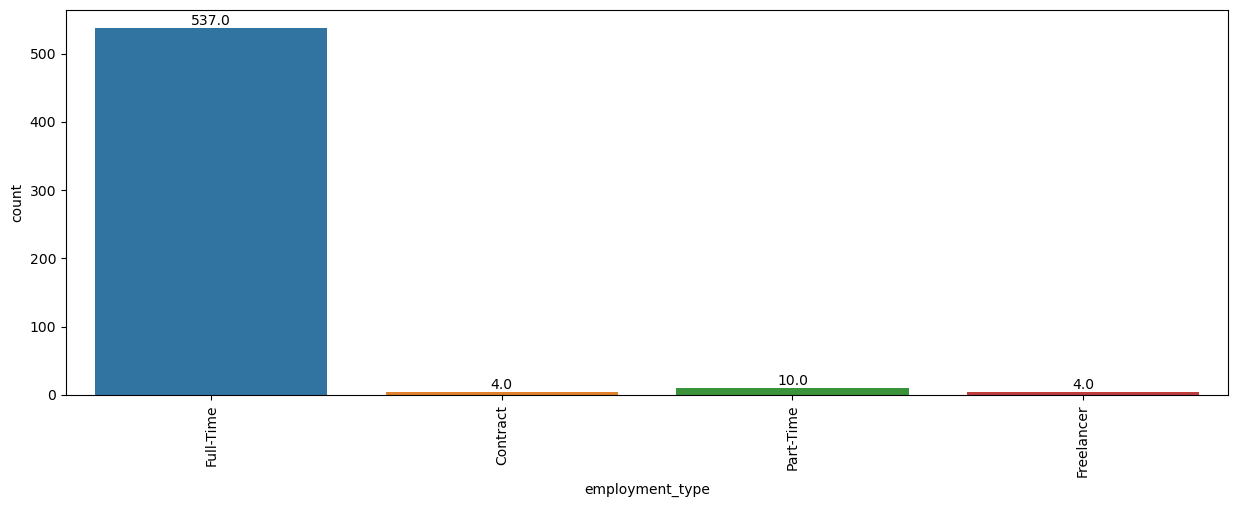

In [254]:
# countplot for Employment Type 
count_plot('employment_type')

**Note above:** Most of the employees are Full Time.

___
**4. Experience Level**

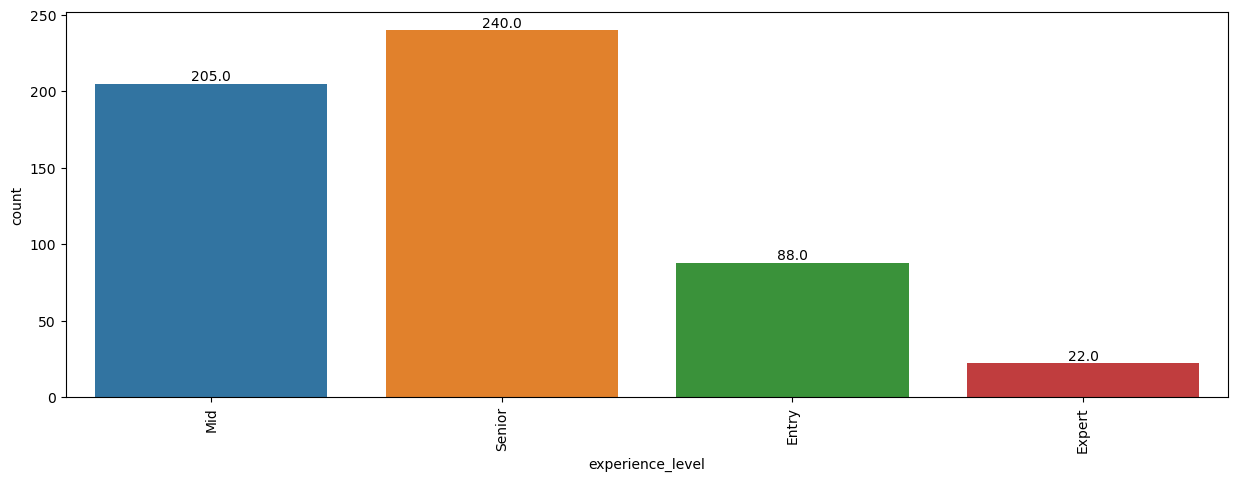

In [255]:
# countplot for Experience level 
count_plot('experience_level')

**Note above:** Most employees are Senior level and second most employees are Mid level employees. There are less employees for Expert level.

___
**5. Job Title**

<Figure size 1500x500 with 0 Axes>

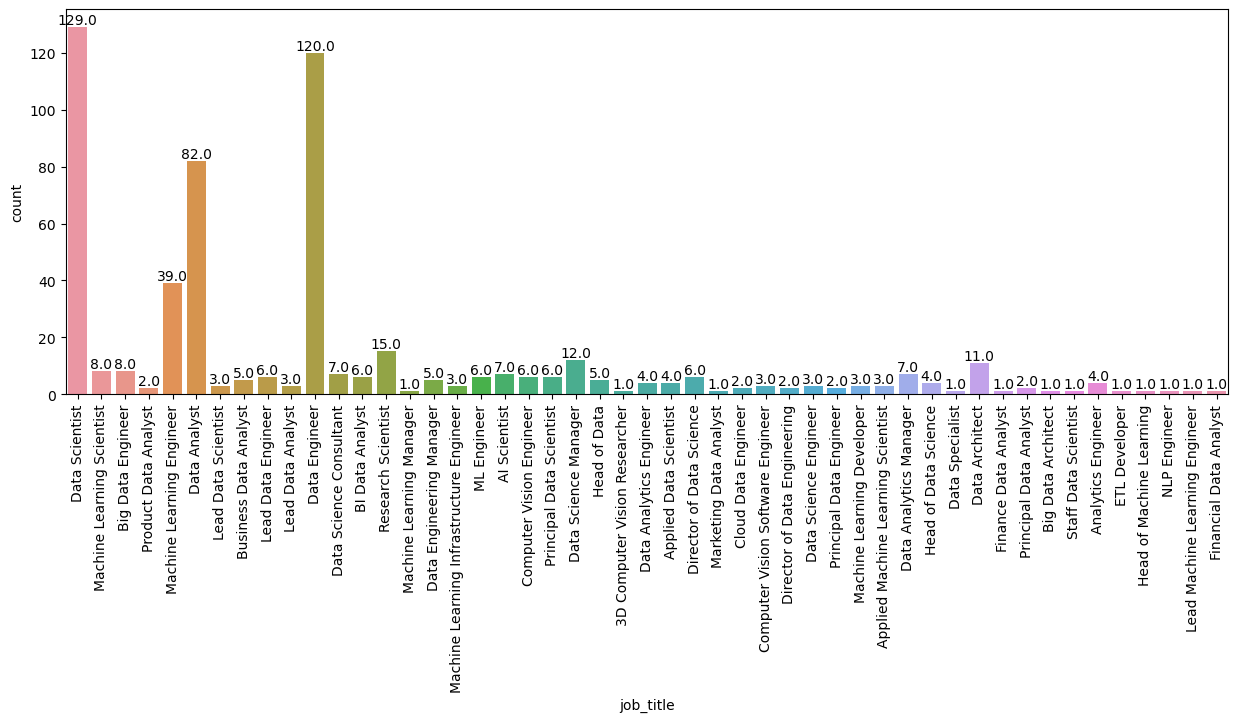

In [256]:
# countplot for job title
plt.figure(figsize=(15,5))
count_plot('job_title')

**Note above:** Most of the jobs are Data Scientist, Data engineer, Data Analyst.

___
**6. Remote Ratio**

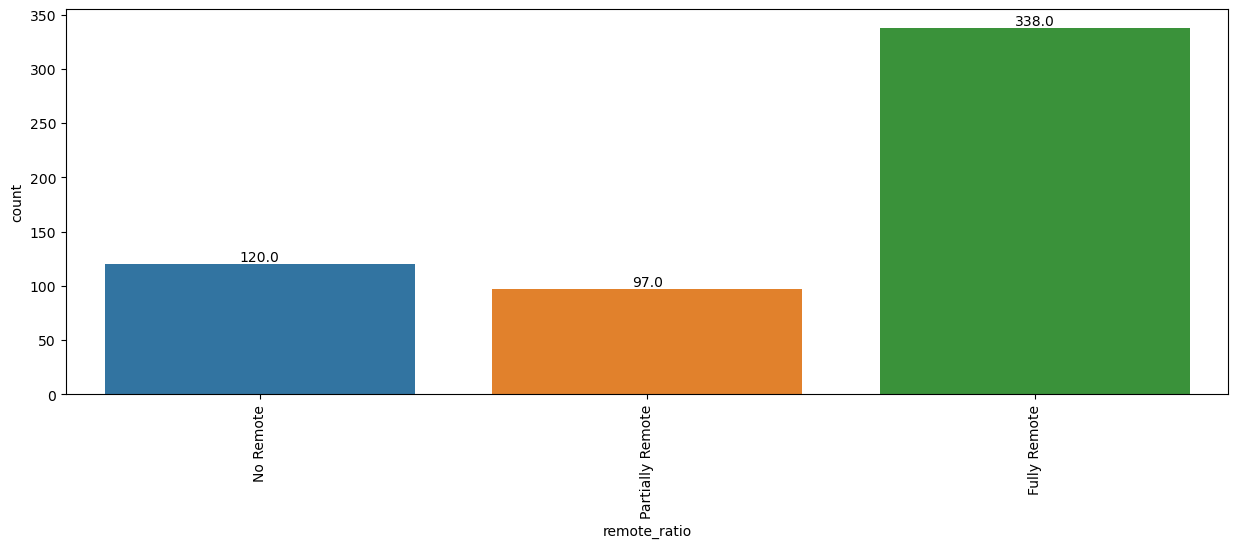

In [257]:
# countplot for remote ratio
count_plot('remote_ratio')

**Note above:** Employees who are working fully-remote are High.

___
**7. Company Size**

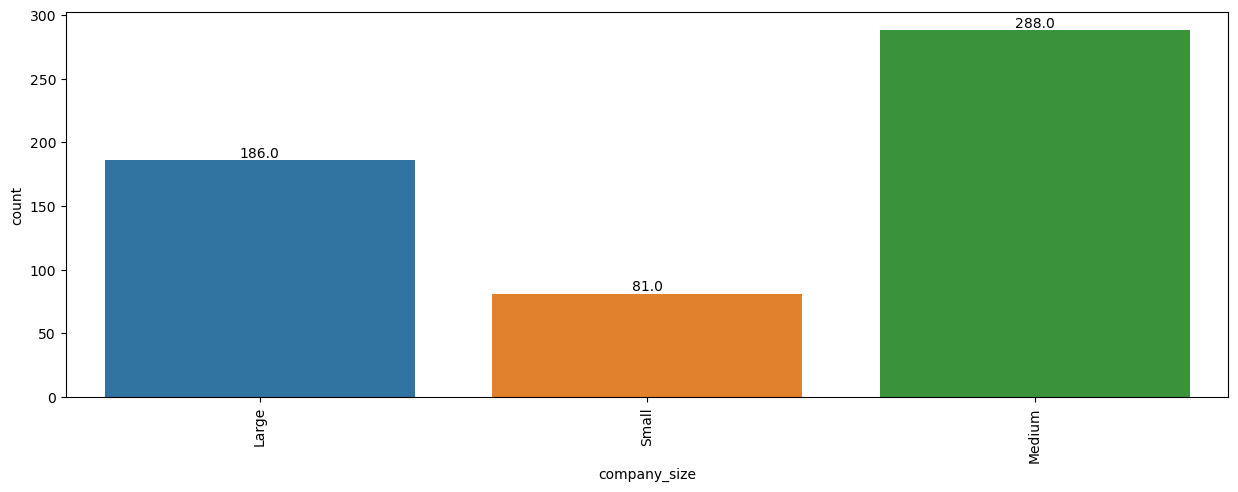

In [258]:
# countplot for company size
count_plot('company_size')

**Note above:** There are mostly Medium size companies are there.

___
**8. Company Location**

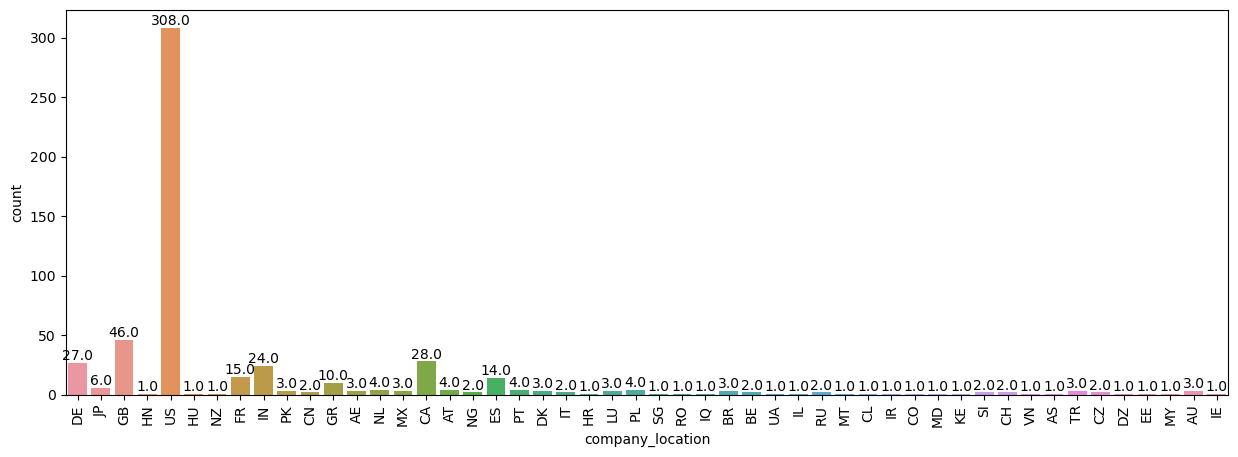

In [259]:
# countplot for company location
count_plot('company_location')

**Note above:** Most of the employees Location is US.

___
**9. Employee Residence**

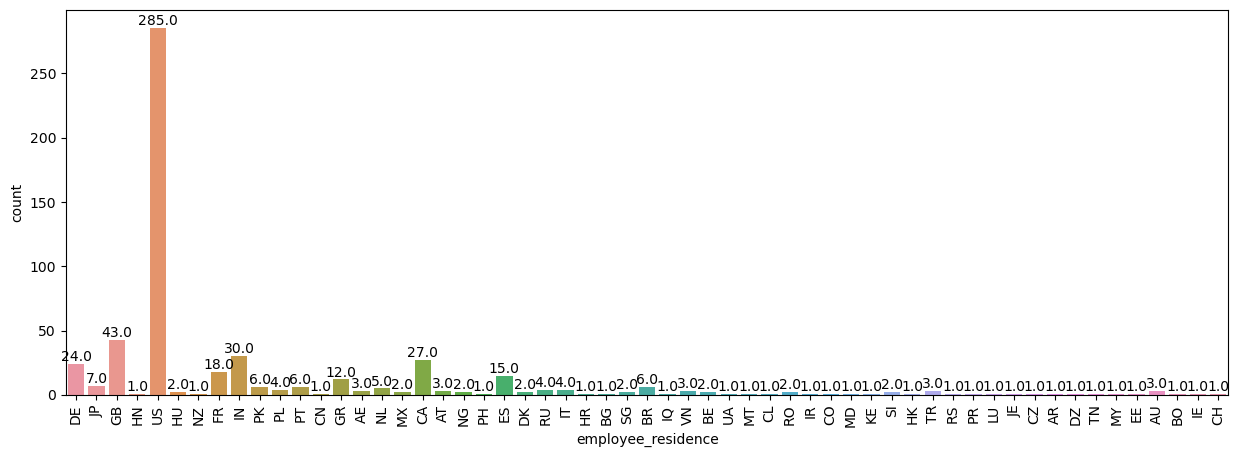

In [260]:
# countplot for employee residence
count_plot('employee_residence')

**Note above:** Same as like location most of the employees residence is US.

___
**Let's answer to some questions that analyze the jobs in varies sections**


1. Which job title earns highest salary ?
2. What is the average salary for each experience level ?
3. What is the average salary for company size Large, Small and Medium ?
4. Does people working full time earns more than contract base employees ?
5. Is salary less for employee woking remotely than who comes to office ?
6. Which country pays more to the employees ?
7. What is the highest earning job in highest paying countries ?
8. What is the highest earning job titles working at expert level ?
9. What is the highest earning job titles working at senioir level ?
10. Has salary of data science job roles increased over the passing years ?
11. What is the trend of salary paid by medium size company over the passing years ?
12. What is the trend of salary paid by large size company over the passing years ?
13. What is the trend of salary paid by medium size company over the passing years ?


___
**Analyze the data according to the questions.**

To create bar plots and box plots let's create a function that can use for many times without giving values everytime when we create a plot.

In [261]:
# Function to plot bar plot
def bar_plot(feature,data,title):
    data = data.groupby(feature)['salary_in_usd'].mean()
    plt.figure(figsize=(10,10))
    ax = sns.barplot(x=data.values, y=data.index)
    for i, v in enumerate(data.values):
        ax.annotate(str(v), xy=(v,i), va='center')
    ax.set_xlabel("salary")
    ax.set_ylabel(feature)
    ax.set_title(title)
    plt.show()

In [262]:
def box_plot(x,y,data,title):
    plt.figure(figsize=(9,5))
    sals_mean = data.groupby([x])[y].mean();
    
    #print(sals)
    ax = sns.boxplot(data=data,y=y,x = x)
    
    vertical_offset_mean = data[y].median() * 0.05 # offset from median for display
    vertical_offset_max = data[y].max() * 0.05
    
    for i,xtick in enumerate(ax.get_xticklabels(which='major')):
        #print(xtick.get_text())
        ax.text(i,sals_mean[xtick.get_text()] + vertical_offset_mean,sals_mean[xtick.get_text()], 
             horizontalalignment='center',size='small',color='w',weight='semibold')
    ax.set_title(title)  
    ax.set_ylabel('Salary')
    plt.show()

___
**1. Which job title earns highest salary?**

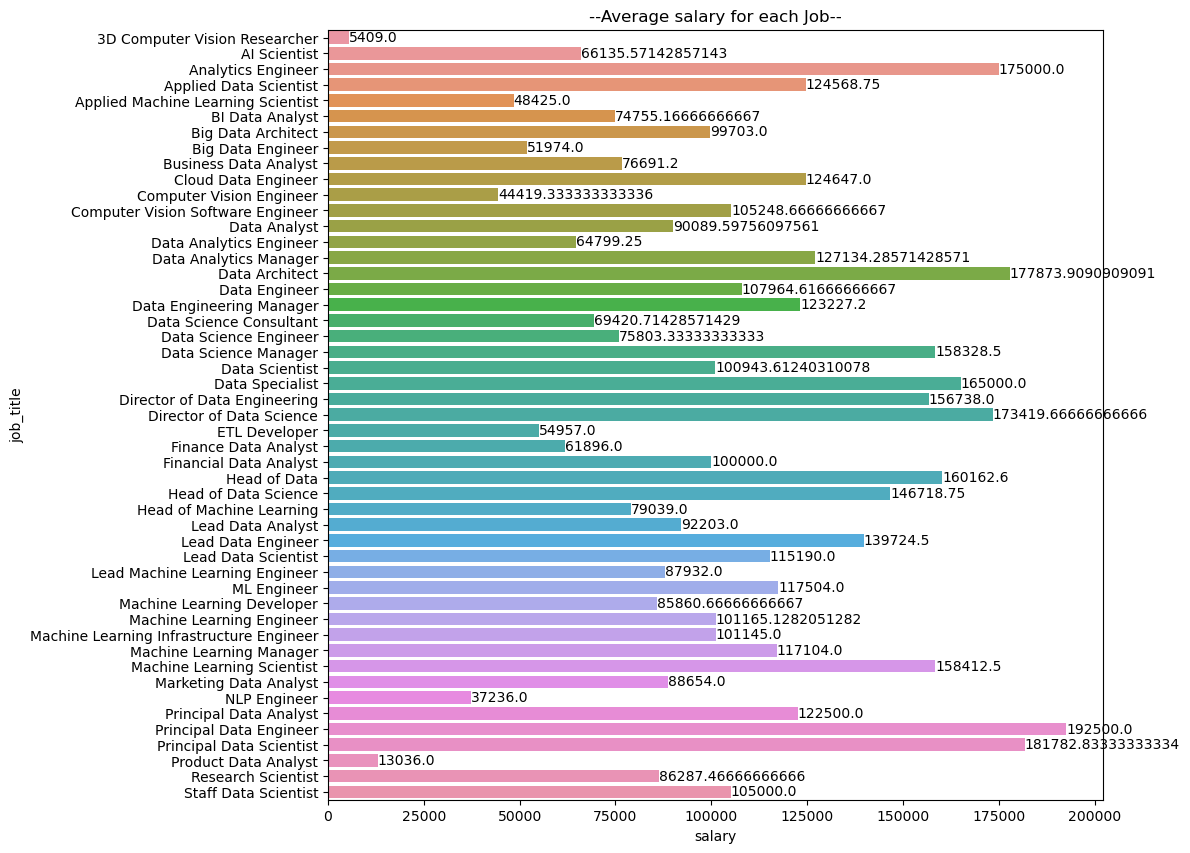

In [263]:
bar_plot('job_title',data,'--Average salary for each Job--')

**Note above:** The top most Jobs which are having Highest salary are Principal Data Engineer, Principal Data Scientist, Data Architect, Director of Data Science, Analytics Engineer. 

___
**2. What is the average salary for each experience level ?**

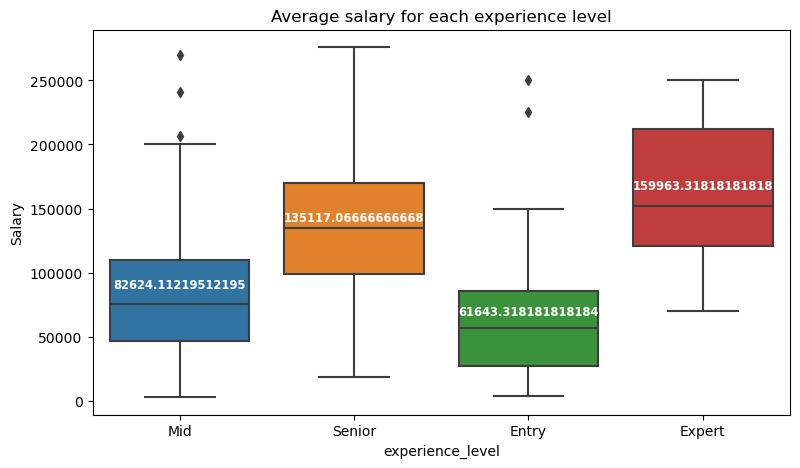

In [264]:
ax = box_plot('experience_level','salary_in_usd',data,'Average salary for each experience level')

**Note above:** Highest experience level for average salary is Expert Level.

___
**3. What is the average salary for company size Large, Small and Medium ?**

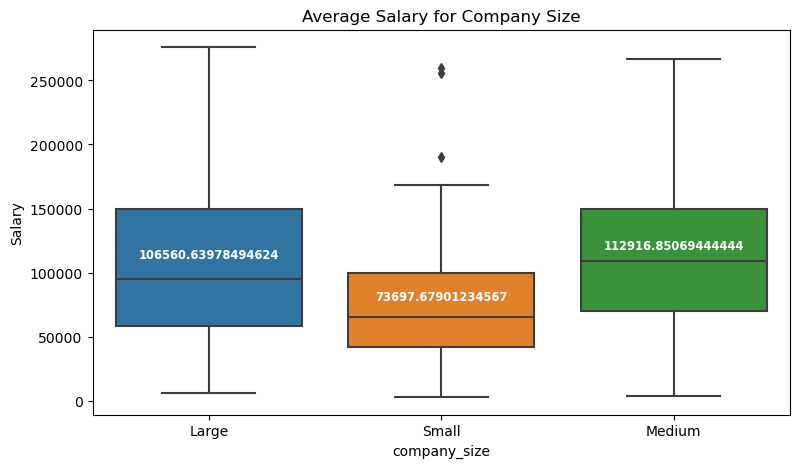

In [265]:
box_plot('company_size','salary_in_usd',data,'Average Salary for Company Size')

**Note above:** Medium size companies are having Highest average salaries.

___
**4. Does people working full time earns more than contract base employees ?**

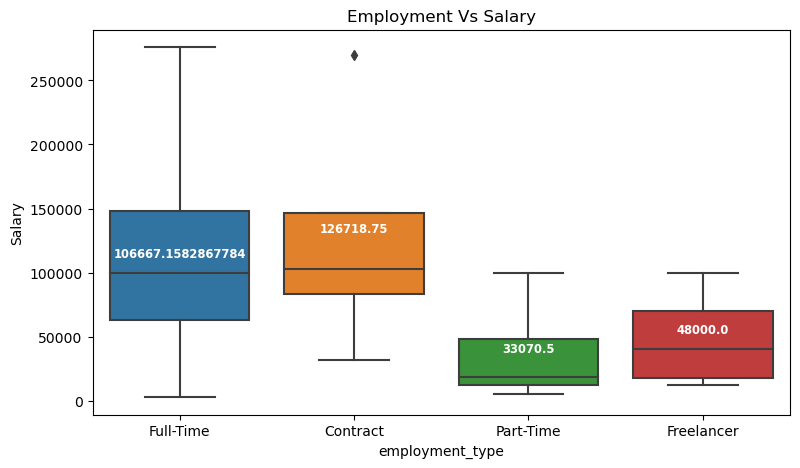

In [266]:
box_plot('employment_type','salary_in_usd',data,'Employment Vs Salary')

As we can see Contract based companies are having highest salaries but it might be impact of outliers. Let's remove those.

In [267]:
data[(data['employment_type'] == 'Contract') & (data['salary_in_usd'] > 250000)]

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
78,2021,Mid,Contract,ML Engineer,270000,US,Fully Remote,US,Large


In [268]:
data = data[~((data['employment_type'] == 'Contract') & (data['salary_in_usd'] > 250000))]

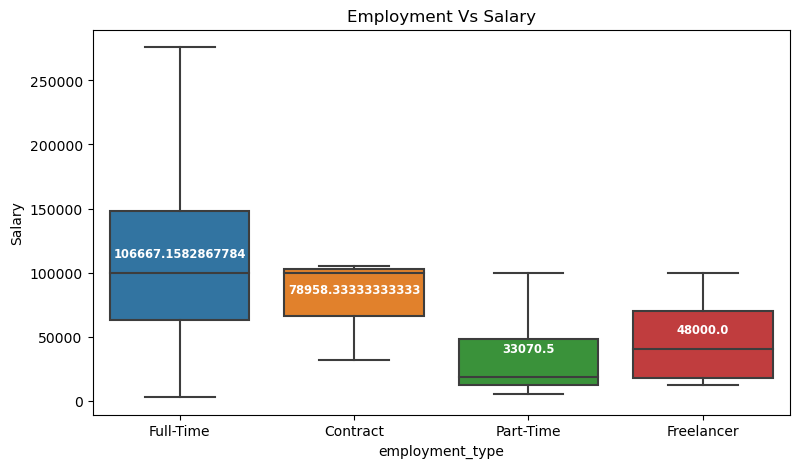

In [269]:
box_plot('employment_type','salary_in_usd',data,'Employment Vs Salary')

**Note above:** Now as we can see The most highest employment type is Full-Time. So Full-time people earns more than Contract base employees.

___
**5. Is salary less for employee woking remotely than who comes to office ?**

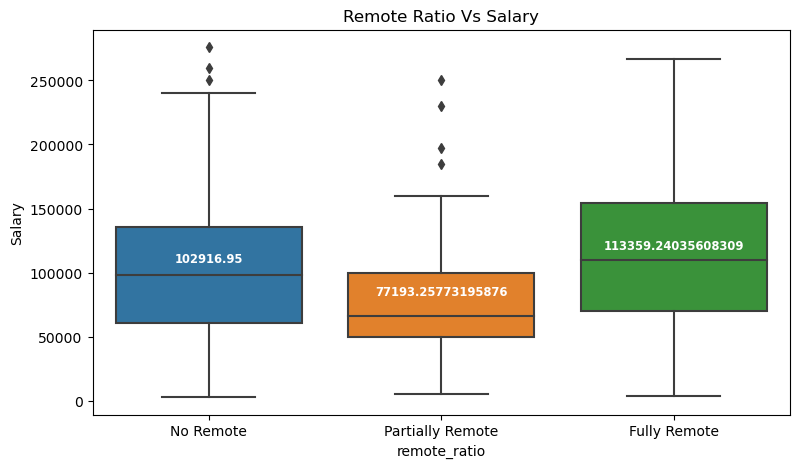

In [271]:
box_plot('remote_ratio','salary_in_usd',data,'Remote Ratio Vs Salary')

**Note above:** Employees who are working Fully Remote earns more than remaining.

___
**6. Which country pays more to the employees ?**

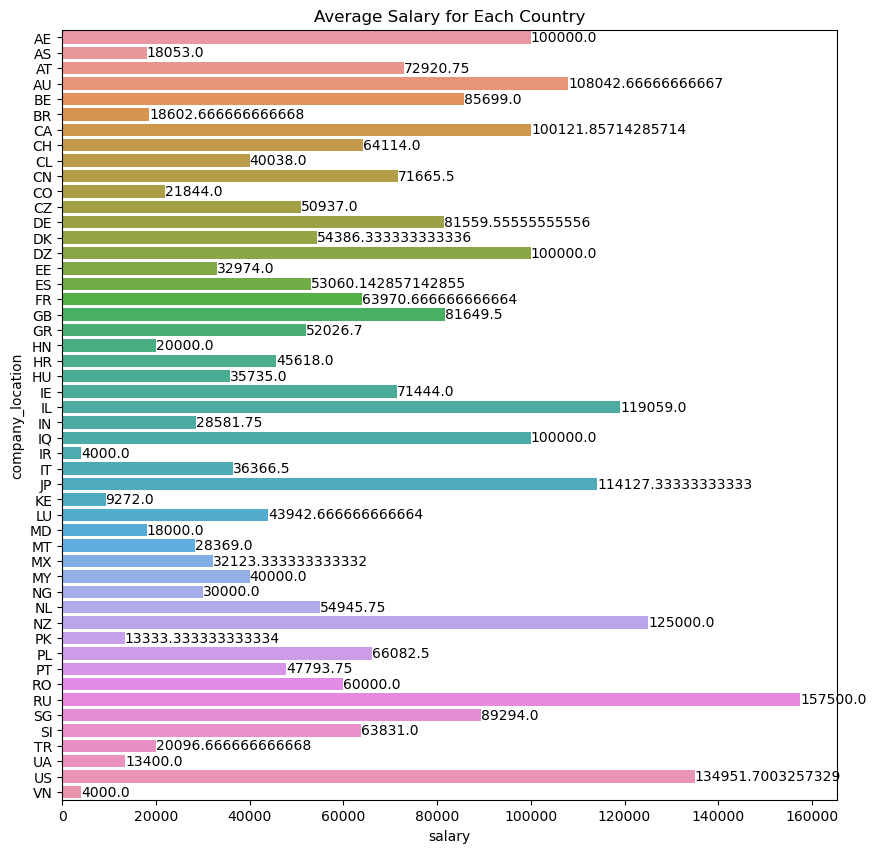

In [275]:
bar_plot('company_location',data,'Average Salary for Each Country')

**Note above:** The top most countries paying highest salaries are Russia and US.

___
**7. What is the highest earning job in highest paying countries ?**

In [278]:
# let's create two separate variables for each highest paying countries. In the above graph we got highest paying country.
data_RU = data[data['company_location'] == 'RU']
data_US = data[data['company_location'] == 'US']

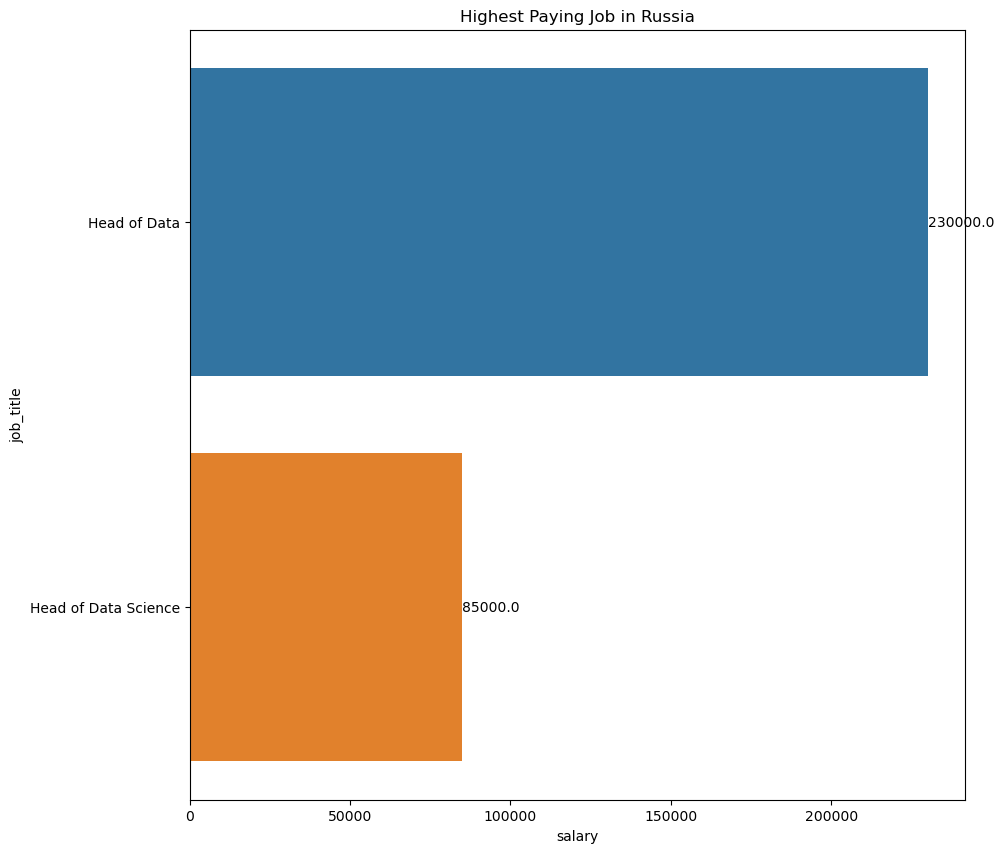

In [280]:
bar_plot('job_title',data_RU,'Highest Paying Job in Russia')

**Note above:** 1. Highest paying job in Russia is Head of Data.

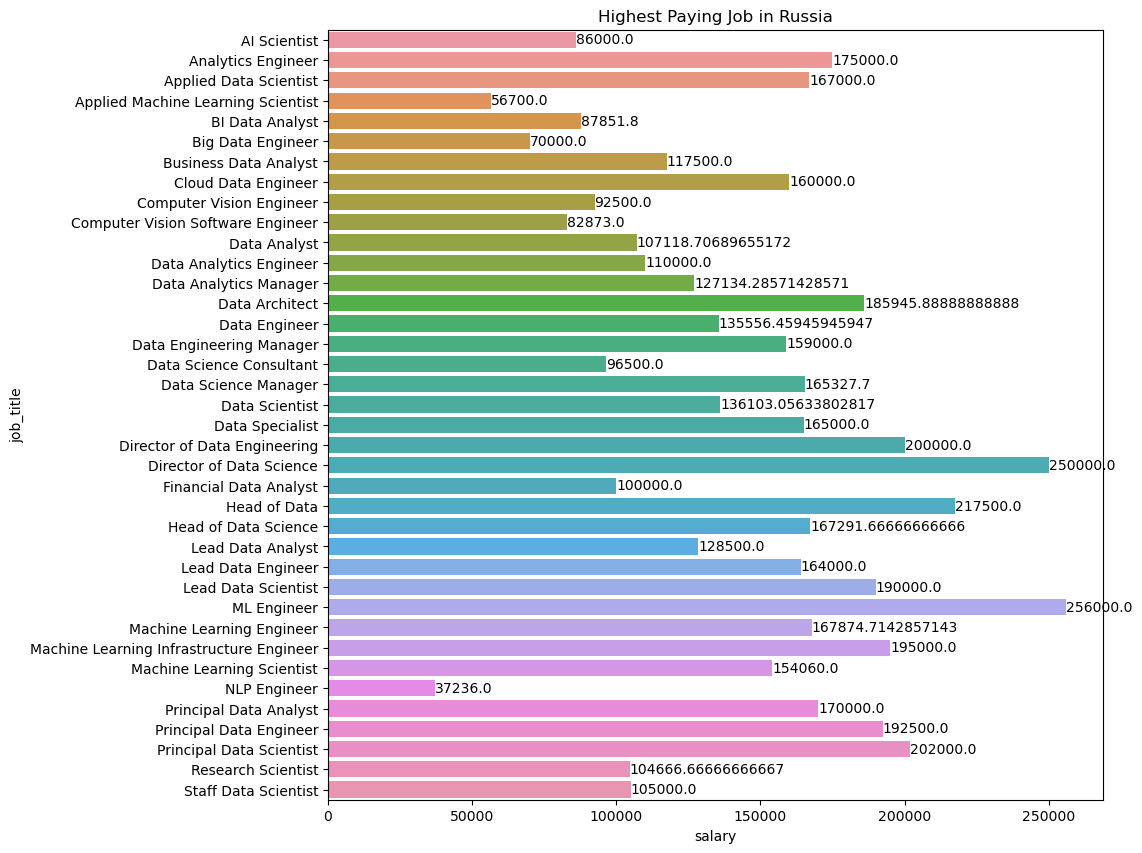

In [281]:
bar_plot('job_title',data_US,'Highest Paying Job in Russia')

**Note above:** 2. Highest paying job in United States is ML Engineer.

___
**8. What is the highest earning job titles working at expert level ?**

In [288]:
data_expert = data[data['experience_level'] == 'Expert']

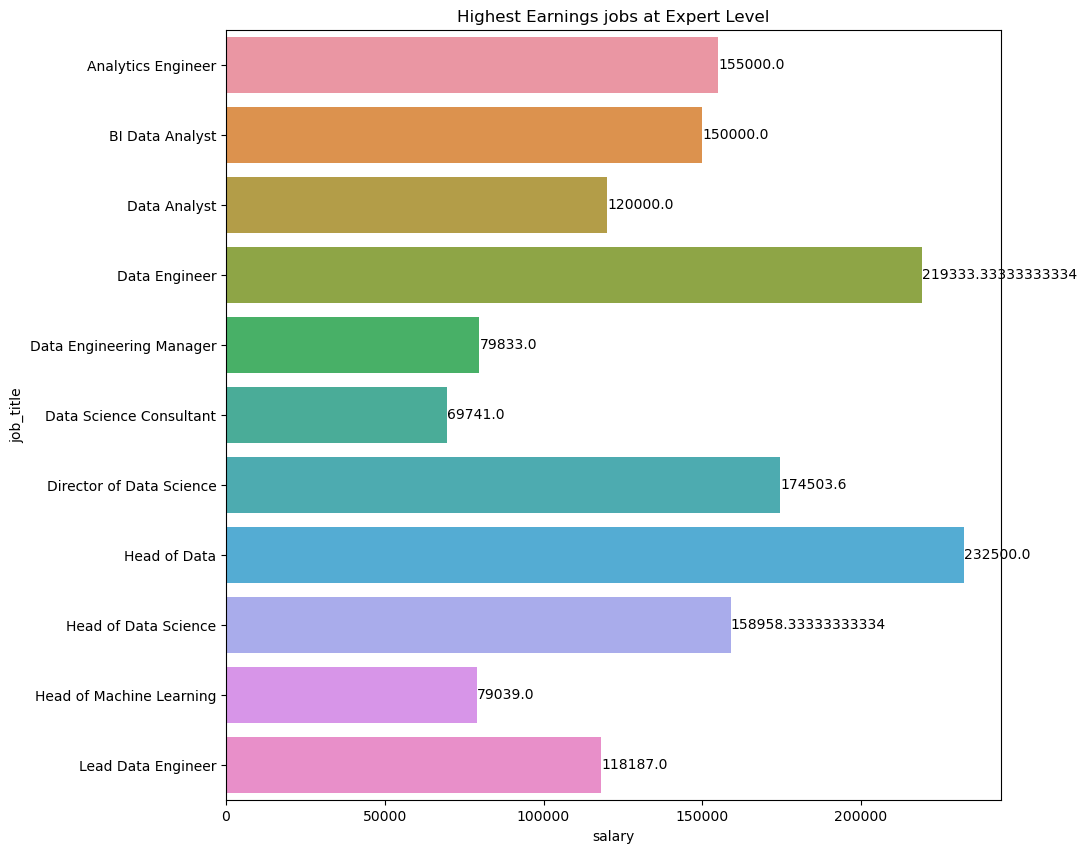

In [293]:
bar_plot('job_title',data_expert,'Highest Earnings jobs at Expert Level')

**Note above:** Head of data and Data Engineer are both highest earning job titles at Expert level.

___
**9. What is the highest earning job titles working at senioir level ?**

In [294]:
data_senior = data[data['experience_level'] == 'Senior']

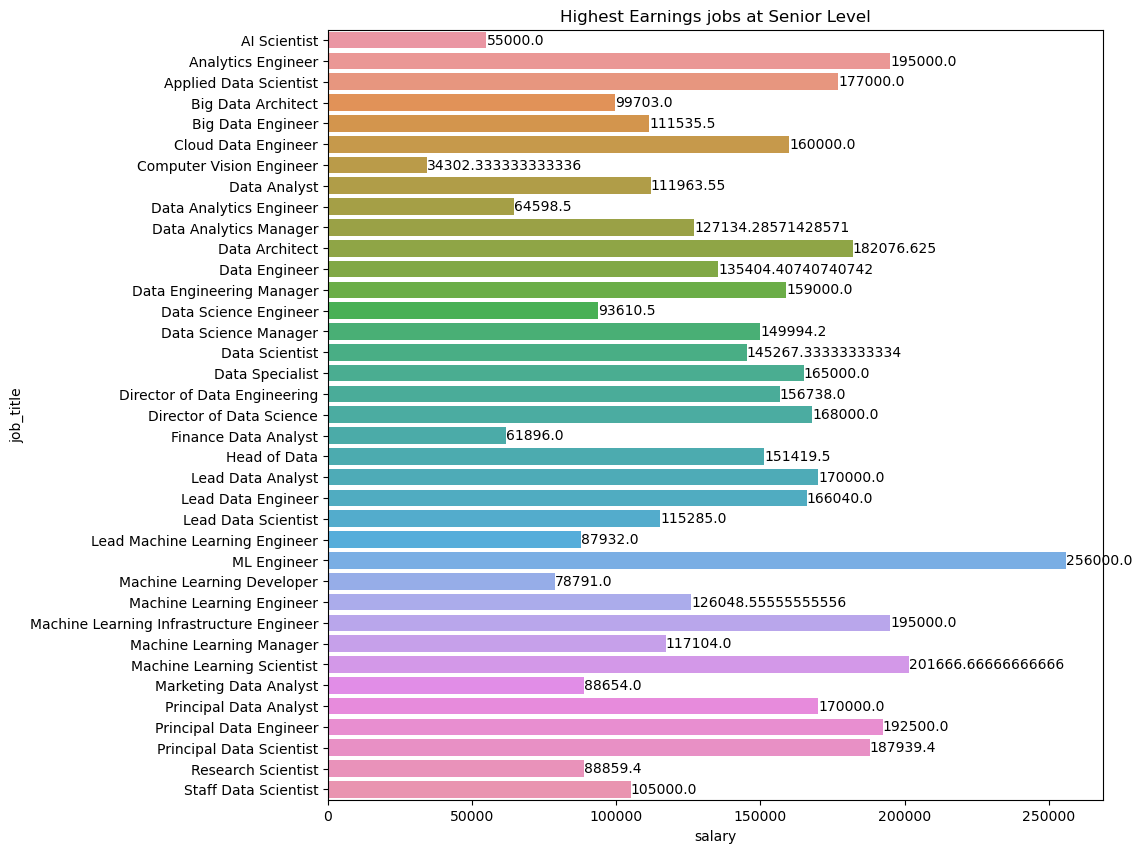

In [295]:
bar_plot('job_title',data_senior,'Highest Earnings jobs at Senior Level')

**Note above:** ML Engineer and Machine Learning Scientist are both highest earning job titles at Senior level.

___
**10. Has salary of data science job roles increased over the passing years ?**

In [324]:
data_year = data.groupby('work_year')['salary_in_usd'].mean()
data_year

work_year
2020     82775.884058
2021     91516.852381
2022    120399.160000
Name: salary_in_usd, dtype: float64

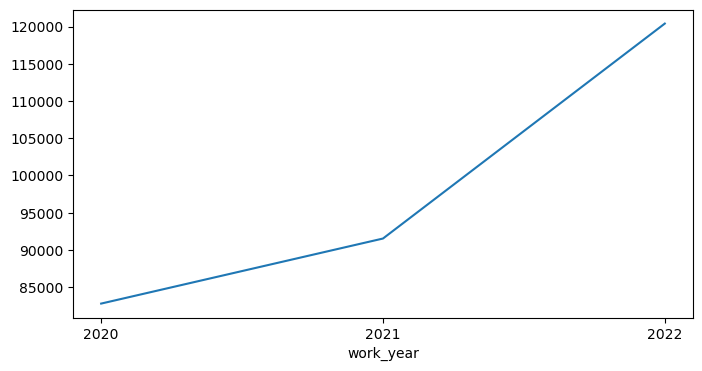

In [325]:
plt.figure(figsize=(8,4))
ax = sns.lineplot(x=data_year.index, y=data_year.values)
ax.set_xticks([2020,2021,2022])

**Note above:** Data Science Jobs salaries trend starts increasing since 2021.

___
**11. What is the trend of salary paid by medium size company over the passing years ?**

In [358]:
data_Medium = data[data['company_size'] == 'Medium']

In [359]:
data_MSyear = data_Medium.groupby('work_year')['salary_in_usd'].mean()
data_MSyear

work_year
2020     89734.230769
2021     74154.792453
2022    123528.396396
Name: salary_in_usd, dtype: float64

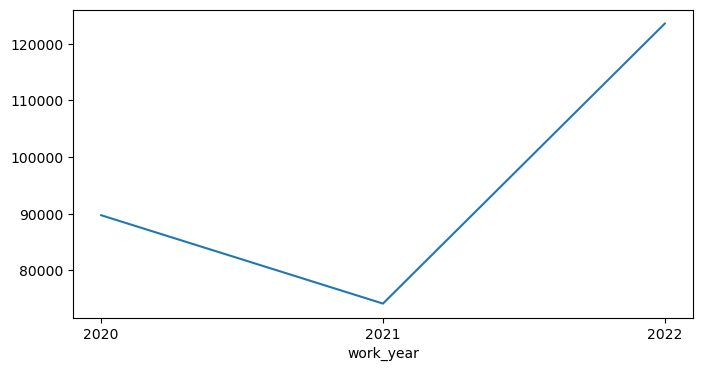

In [360]:
plt.figure(figsize=(8,4))
ax = sns.lineplot(data=data_MSyear,x=data_MSyear.index, y=data_MSyear.values)
ax.set_xticks([2020,2021,2022])

**Note above:** In 2020 salary paid by medium size companies gradually reduced and kick starts increasing rapidly from 2021. 

___
**12. What is the trend of salary paid by large size company over the passing years ?**

In [361]:
data_Large = data[data['company_size'] == 'Large']

In [362]:
data_LSyear = data_Large.groupby('work_year')['salary_in_usd'].mean()
data_LSyear

work_year
2020     89387.967742
2021    106516.743363
2022    115679.512195
Name: salary_in_usd, dtype: float64

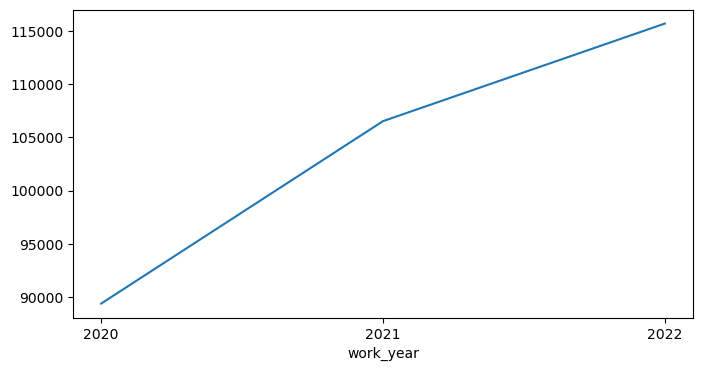

In [363]:
plt.figure(figsize=(8,4))
ax = sns.lineplot(data=data_LSyear,x=data_LSyear.index, y=data_LSyear.values)
ax.set_xticks([2020,2021,2022])

**Note above:** Salary paid by Large size companies gradually increasing over the passing years.

___
**13. What is the trend of salary paid by small size company over the passing years ?**

In [364]:
data_Small = data[data['company_size'] == 'Small']

In [365]:
data_SSyear = data_Small.groupby('work_year')['salary_in_usd'].mean()
data_SSyear

work_year
2020    70958.560000
2021    73907.795455
2022    78633.750000
Name: salary_in_usd, dtype: float64

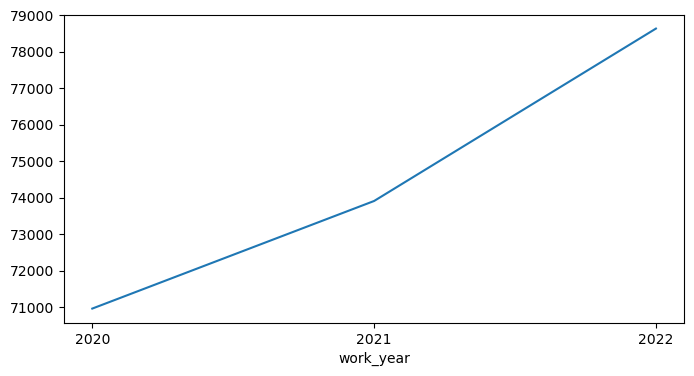

In [368]:
plt.figure(figsize=(8,4))
ax = sns.lineplot(data=data_SSyear,x=data_SSyear.index, y=data_SSyear.values)
ax.set_xticks([2020,2021,2022])

**Note above:** Since 2020 Small size companies salary not increased very much to 2022.

## Thank You!